In [1]:
import pickle
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))
true_df_backup = pickle.load(open("pickle_files/true_df_backup.pkl", "rb" ))

In [3]:
true_df.source.value_counts()

Info wars          515
Reuters            495
Mother Jones       455
Activist Post      420
National Review    418
Huffington Post    412
Alabama Today      385
Daily Beast        347
Breitbart          307
Global Research    190
Fox News           121
Associate Press     27
Name: source, dtype: int64

In [46]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

In [89]:
test = [
"you watch find why v=fjndki3kb6k follow follow s 0 if s //www.facebook.com/paul.j.watson.71 '100",
]

In [90]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

In [91]:
cleaned_text = clean_text(true_df.body)

In [92]:
testing

["you watch watch find find whi whi v=fjndki3kb6k v=fjndki3kb6k follow follow follow follow s 0 0 if s //www.facebook.com/paul.j.watson.71 //www.facebook.com/paul.j.watson.71 '100"]

In [34]:
with open('cleaned_text.pkl', 'wb') as picklefile:
        pickle.dump(cleaned_text, picklefile)

In [3]:
cleaned_text = pickle.load(open("pickle_files/cleaned_text.pkl", "rb" ))


In [16]:
no_stem_text = pickle.load(open("pickle_files/no_stem_text.pkl", "rb" ))


In [21]:
os.system('say "This job is as done as we are with Sarah Sander\'s stupid lies."')

0

In [13]:
len(cleaned_text)

4092

In [4]:
test = [
 "'' '' '' /* get first 0 '' '' first two give must download whole two “ it next fifth cellular coverag wireless fast about think 10 100 speedier cellular even faster anyth get physic fiber-opt go you ’ ll ’ ” 0 0 '' '' if s 0 '' '' '' '' '' '' lunat instal small close togeth hundr “ the next big cellular bring lightning-fast wireless thousand antenna-top long banned. make easier instal local often restrict them near lobbi local across say need ensur unsightli pole front they hear resid worri possibl long-term now much equip radio-frequ hous kept hundr also harm small far antenna transmitt smaller lower-powered cluster closer lower the keep becaus elit want rest us it ’ catastroph making i ’ extrem anoth here flesh ago wa interconnect grid whole told would onli avoid huge and voila bring modern 21st now it ’ differ classic wa promis one all switch bring us 100 billion devic connect could wasteful could ridiculous opposit sane energi realli whether hi keep take must cook set temperatur four live t measur much devic ultim is everi energi it planetari grid energi patrick classic technocraci worldwid technocraci 1930s adsbygoogl set requirements—which ’ t technic then quit now real-tim energi use one energi could controlled for good all ” make “ we ’ r stun long-rang automat everyth done you really that ’ cover ultimately abl measur everi much everi individu control energi run oper energy. ” like smart smart agenda 21 smart justif begin actual energi would start dump whole instal small transmitter-cel fenc forget it ’ bring 100 billion devic asid extrem it ’ ridicul expensive it ’ say need thousand-foot offic movi star instal 30 engin build back three dri him smart that gave global energi go decid small african need given much us sacrific energi social yet anoth won ’ see govern clean suppli small african instal modern popul poverty-stricken vast stolen mega-corpor give back local whole energi technocratic aim lower wreck make much easier said this knowledg hi right would propos reli many many mani close other would far vulner physic disrupt present 4g find mani us militari must develop ai-control transmitter/cel someth here anoth we ’ r told about atmospher mean signal along without us obsess bring onlin quickli competit develop “ if it sooner better. issu must first report us govern build whole like would chosen govern non-bid would veri tight top would maxim expand already-satur ’ noth better three revealed candid us 29th maintain practic creativ nomin pulitz investig 30 write weekly spin stern newspap magazin us europe global creativ around hi free nomorefakenew free outsidetherealitymachin here 0 0 '' '' if s 0 '' '' '' '' '' '' free autom apocalyps free get start quick uniquekey 87109 '' activist window.mc4wp on ye leav you'r free free surviv autom apocalyps share158tweet+1pin previou next disqus_identifi '169439 disqus_container_id global '' disqus_config this object /* add abil add current get initi ani depend oninit depend templat afterrend templat onreadi done clear it fill seo/legaci sync script.async true script.src '' 0 /* '' /*"
]

In [15]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    phrases = []
    for x in text_list:
        words = pos_tag(word_tokenize(x))
        #werdz2 = (['CC','CD','DT','EX','FW','IN','LS','MD','PDT','POS','PRP','PRP$',
                   #'RP','TO','UH','WDT','WP','WP$','WRB', 'NNP', 'NNPS', 'NN', 'NNS', ',', '.', ':', '(', ')'])
        werdz3 = ['NNP', 'NN', 'NNP', 'NNPs', 'NNS', ',', '.', ':', '(', ')', '#', '``']
        werdz = [s for s in words if s[-1] not in werdz3]
        #print(werdz)
        say_no = ['@','[', ']', 'amp', 'window', 'open','click', 'googletag', 'gpt', 'linkitem', 'googletag', 'getelementbyid',
        'config', 'ldadinit', 'advertis', 'typeof', 'adsdiv', 'fjs', 'js', 'http', 'com', 'awr', 'new', 'function', 'div',
        'ad', 'script', 'typeof', 'nr_is_logged_in', 'undefined', 'adsdiv', 'sharebox_260x60', 'ifr', 'jwplayer', 'jwp',
        'pubdate', 'adunit', 'adwidth', 'www', 'bit.ly/2jpexyr', 'googletag.cmd.push', 'googletag.display', '\'div-gpt-ad-1415299254516-0 \'',
        'open', 'opening', 'opens', 'opened', 'alabama', 'loading', 'email', 'advertise', 'apps', 'closed', 'help', 'publish',
        'rendered', 'undefined', 'adsdiv', 'reloadcount', 'adsdiv.reloadcount', 'window.orignetid', '\'undefined', 'window.origadsplid', 'needsrecovery',
        'io_c3sd.ads', 'elem', 'box', 'box.offsetheight', 'box.style.marginright', 'marginright', 'ad_sharebox_260x60', 'trump',
        'russia', 'fox', 'alerts', 'facebook', 'reuters', 'rsize', 'i+= resize /scr+ipt', 'ipt', 'scr', 'script', 'window.adsetsynccalled',
        'adsetsynccalled', 'recoveryid', 'enablequeue', 'slotrenderended', 'beast', 'daily beast', 'clicking', 'subscribed', 'korea', 'north korea', 'south korea',
        'breitbart', 'epa', 'labelmapping', 'comey', 'scotus', 'republicans', 'cohen', 'iran', 'syria', 'eagles', 'april', 'colorado', 'fbi',
        'haspel', 'wedding', 'puerto', 'rico', 'puerto rico', 'huffpost', 'donald', 'don', 'nra', 'sachs', 'kelly', 'facebook', 'mohammed',
        'div-gpt-ad-1415299254516-0 ', '\'div-gpt-ad-1415299254516-0 \'', '\'slotrenderended \'', 'slotrenderended', 
        '\'.single-post # div-gpt-ad-1415299254516-0 \'', 'slotrenderended', 'ldadinit', 'roseanne', 'israel', 'gaza', 
        'china', 'beijing', 'samantha', 'bee', 'valierie', 'subscribe', 'prelimmonth', 'ivanka', 'documentcloud', 'melania', 
        '(', ')', '-', ',', '.', '!', '"', '\'', 'var', "\'div-gpt-ad-1415299254516-0", 'div-gpt-ad-1415299254516-0', '\'.single-post'
        '\'slotrenderended', 'funct', '.contents', 'googletag.pubads', "\'slotrenderended", "\'.single-post", "'div-gpt-ad-1403197269028-0"
        , 'line-height', '>', 'adtech-adspot', '//', '/style', 'overrid', 'window.adsetplid', 'adid', '||', 'adtech_call_typ',
        'by_request', 'adtech_call_typ', 'iframe_proxy', 'ifr.offsetwidth', "ifr.offsetheight", "'jquery", "'readytorecover",
        'args', "waitforglobal", 'arg', "elem.contains", "'reloadad", 'els', "'adtech", 'refreshr', "'none", 'collapsed', 
        'fc', 'f', 'ajax', 'needsrecoveri', 'i+=', '&', '<', '=', 'http', 'https', "'http", "'http", "'script", 'twitter', 
        '/.test', "'https", 'newsletter-inline-widget', 'margin-bottom', '15px', 'font-weight', 'font-size', '12pt', 'div.mc-field-group',
        'padding-bottom', 'padding-right', 'input.mc-input', '.newsletter-inline-widget', 'font-family', '.wpcf7-form-control.wpcf7-text',
        '7e7e7e', 'arial', '.wpcf7', '.wpcf7-form-control.wpcf7-text', '.newsletter.widget__contain', '.wpcf7-form-control.wpcf7-submit',
        'box-shadow', 'text-shadow', 'letter-spacing', '.newsletter.widget__wrap', '.newsletter.widget__head', 'text-transform', 
        'max-width', 'td.first', 'padding-left', 'border-radius', 'hr.divid', 'p.subtext','==typeof', '.gettime', 'window.outerwidth',
        'rcel.async', '/**', 'url', "'data-timestamp", '+new', 'd.head', 'javascript', 'php_widget-140', 'php_widget-104', '.today-on-the-show-cont',
        '.alignleft', 'margin-right', 'margin-top', '.alignright', "'/wp-content/uploads/static/tots.html", "'.today-on-the-show-content",
        "'.today-on-the-show-cont", '.html', 'img.hero-ad-speci', 'fa', 'fa-chevron-down', 'usercollapsetext', 'newsletter-side-widget', 
        'ul.stansberry-form', 'text-align', 'margin-left:0', 'margin-bottom:5px', 'border-top', '-webkit-border-radius', '-khtml-border-radius',
        'border-width', 'border-style', 'border-right', 'padding-left:8px', '.textsiz', 'margin-top:5px', 'ul.links_list', 'img.breaking_imag', 
        'adtech_sharebox_260x60', 'advertisement', '===', 'kraken__adblock.active', 'i=0', 'id=', 'style=', '//www.documentcloud.org/documents/4434037-hhrg-115-if00-wstate-zuckerbergm-20180411.js', 
        '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.pdf', 'br', 'lt', '//assets.documentcloud.org/documents/4434037/hhrg-115-if00-wstate-zuckerbergm-20180411.txt',
        '//www.documentcloud.org/documents/4425618-van-der-zwaan.js', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.pdf', '//assets.documentcloud.org/documents/4425618/van-der-zwaan.txt',
        'subscrib', 'window.datawrapper', '.embeddeltas', 'datawrapper-height', '=typeof', '==', 'div-gpt-ad-inline_1_mobile', '.jw-player-contain', "'jwp",
        '.playlist', 'episode.title', 'ns_st_st=\\', 'ns_st_pu=\\', 'ns_st_pr=\\', 'ns_st_ep=\\', 'ns_st_ia=\\', 'div-gpt-ad-native_mobile', 'div-gpt-ad-inline_2_mobile',
        'div-gpt-ad-inline_3_mobile', 'ns_st_sn=\\', 'ns_st_en=\\', 'ns_st_ge=\\', 'ns_st_ce=\\', 'ns_st_ddt=\\', 'ns_st_tdt=\\', 'div-gpt-ad-native', 'div-gpt-ad-inline_4_mobile',
        '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/slideshow\\/596990', '\\u0000*\\u0000links', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/media', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/categories',
        '\\/\\/api.w.org\\/term', '\\/\\/www.nationalreview.com\\/wp-json\\/wp\\/v2\\/tags', '\\/\\/www.nationalreview.com\\/photos\\/prince-harry-meghan-markle-royal-wedding\\/', '2fwww.nationalreview.com', 'text=harri', '2fprince-harry-meghan-markle-royal-wedding',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-26.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-8.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-37.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-110.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-111.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-45.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-38.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-44.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-7.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-12.jpg', 
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-11.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-43.jpg', 
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-21.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-18.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-22.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-116.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-42.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-14.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-39.jpg', '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-54.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-112.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-106.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-25.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-46.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-24.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-29.jpg',
        '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-48.jpg', '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-107.jpg',
        '\\/\\/i0.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-47.jpg', '\\/\\/i2.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-33.jpg',
        '\\/\\/i1.wp.com\\/www.nationalreview.com\\/wp-content\\/uploads\\/2018\\/05\\/harry-meghan-royal-wedding-51.jpg', 'google_ad_cli', 
        'adunit.style.display', '.length', 'google_ad_width', 'google_ad_height', 'adunit.style.margin', 'adunit.style.textalign', 'adunit.classnam',
        '//www.activistpost.com/2018/06/israeli-selling-surveillance-systems-governments-around-world.html', "'theactivistpost", '.innerhtml', 'ld-ajs', 'w.ldadinit=w.ldadinit||', '//www.activistpost.com/2018/06/google-quits-drone-program-u-s-navy-wants-drone-motherships-with-help-of-a-i.html',
        '302px', '422px', '300px', '0px', '12px', '60px', '25px', '250px', '3px', '40px', '1px', '10px','titl', '0\\', '//www.activistpost.com/2018/04/us-bombs-syria-to-cover-up-lack-of-evidence-on-chem-attacks-discredits-own-claims-by-doing-so.html', 
        '//www.activistpost.com/2018/05/red-nose-day-recognizes-kids-living-in-poverty-article-the-rich-get-smart-the-poor-get-technology-the-new-digital-divide-in-school-choice-highlights-part-of-the-problem.html', 
        'firstscript', 'dsqlocal', "'trackback_url", 'disqus_shortnam', 'fb-extra-h2', 'prelimd', 'resize', 'scr+ipt', 'paul', 'watson']
        regex = re.compile(r"\S+www.nationalreview.com\S+")
        linkstr = re.findall(regex, str(werdz))
        say_no.append(linkstr)
        #regex2 = re.compile(r"\\\S+")
        #linkstr2 = re.findall(regex2, str(werdz))
        #say_no.append(linkstr2)

        werdz = ([s[-2] for s in werdz if s[-2] not in say_no and 'wp.com' not in s[-2] and 'facebook.com' not in s[-2] and
                 '1897954795849722' not in s[-2] and '999999' not in s[-2] and "'100" not in s[-2] and 'prelimmonth' not in s[-2]
                 and '5g' not in s[-2] and 'scr+ipt' not in s[-2] and 'documentcloud.org' not in s[-2] and 'www.' not in s[-2]
                 and '10 10' not in s[-2] and 'labelmap' not in s[-2] and 'finald' not in s[-2] and '23390304' not in s[-2]
                 and 'box.' not in s[-2] and 'label.' not in s[-2] and '.style' not in s[-2] and '10 100' not in s[-2]])
        
        #check cleaned text line from function above
        no_nouns.append(' '.join(werdz))
        #no_nouns.append(werdz)
    return no_nouns

In [16]:
final_round_clean = drop_nouns(cleaned_text)

In [33]:
how = []

regex = re.compile(r"\\\\\S+www.nationalreview.com\S+")
huh = re.findall(regex, str(testing))
how.append(huh)

In [81]:
final_round[0]

'follow account u.s. u.s. hold america great nashvil u.s. may 29 2018. own great mayb democrat final done accept high high need border 0002 great big even fake said big much bigger ever thought possible much big may big red work hard 0916 whose great wa honor white wa fantast morn special 0937 fake unfair vicious great first recoveri surgeri everyth near left and me n.y. fake realli well 0948 sourc bengaluru bureauour'

In [7]:
testing

["'' get first 0 first two must download whole two “ it next fifth cellular fast about think 10 100 speedier cellular even faster anyth get physic fiber-opt you ’ ll 0 0 if s 0 lunat instal small close togeth “ the next big cellular lightning-fast thousand antenna-top long banned make easier instal local often restrict them near lobbi local across say need ensur unsightli they hear resid worri possibl long-term now much equip radio-frequ hous also harm small far antenna transmitt smaller lower-powered closer lower the keep want us it ’ catastroph making i here flesh ago wa interconnect grid whole would onli avoid huge and voila modern 21st now it ’ classic one all bring us 100 billion could wasteful could ridiculous opposit realli whether hi keep must cook set temperatur four live measur much is everi energi it planetari grid patrick classic technocraci 1930s set requirements—which then quit now real-tim one could controlled for good all make we ’ r stun long-rang done you really that 

In [15]:
how_can_this_happen = pickle.load(open("pickle_files/how_can_this_happen.pkl", "rb" ))


In [14]:
final_round_clean[:1000]

['follow account u.s. u.s. hold america great nashvil u.s. may 29 2018. own great mayb democrat final done accept high high need border 0002 great big even fake said big much bigger ever thought possible much big may big red work hard 0916 whose great wa honor white wa fantast morn special 0937 fake unfair vicious great first recoveri surgeri everyth near left and me n.y. fake realli well 0948 sourc bengaluru bureauour',
 'said u.s. special 2016 u.s. guest white hous u.s. may 30 2018. “ they 13 partisan make exclud him who tri very veri hard him get done wrong ” said question-and-answ confer 17 special thirteen regist four either unaffili unknown accord regist republican rod deputi him whether 2016 whether brought includ former look whether offic polici “ they can ’ t emot whole russian and invent said former refer told u.s. ” whether would lean william jeffrey write larri',
 'u.s. hous ask wednesday prospect hous nafta indic wa much left current so u.s. hous speak ceremoni sever hous 

In [17]:
with open('final_round_clean.pkl', 'wb') as picklefile:
        pickle.dump(final_round_clean, picklefile)

In [33]:
'''text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'''

'text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'

In [107]:
os.system('say "Your move.....Commander"')

0

Without join: 134 µs ± 2.04 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

With join: 289 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)

In [ ]:
os.system('say "your move Commander"')

In [51]:
with open('final_round.pkl', 'wb') as picklefile:
        pickle.dump(corpus, picklefile)

In [3]:
'''cleaned_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''

In [4]:
corpus = pickle.load(open("pickle_files/corpus.pkl", "rb" ))

In [5]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

X = count_vectorizer2.fit_transform(corpus)

In [ ]:
n_topics = 50
n_iter = 10
lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42,
                               learning_method='online')
X_centered_projected = lda.fit_transform(X)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [ ]:
def display_topics(model, feature_names, no_top_words):
    '''Creates a list of words in each topics'''
    for ix, topic in enumerate(model.components_):
        print("Topic ", ix+1)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda,count_vectorizer2.get_feature_names(),20)

In [119]:
SSEs = []
Sil_coefs = []
for k in range(2,21):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_centered_projected)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X_centered_projected, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

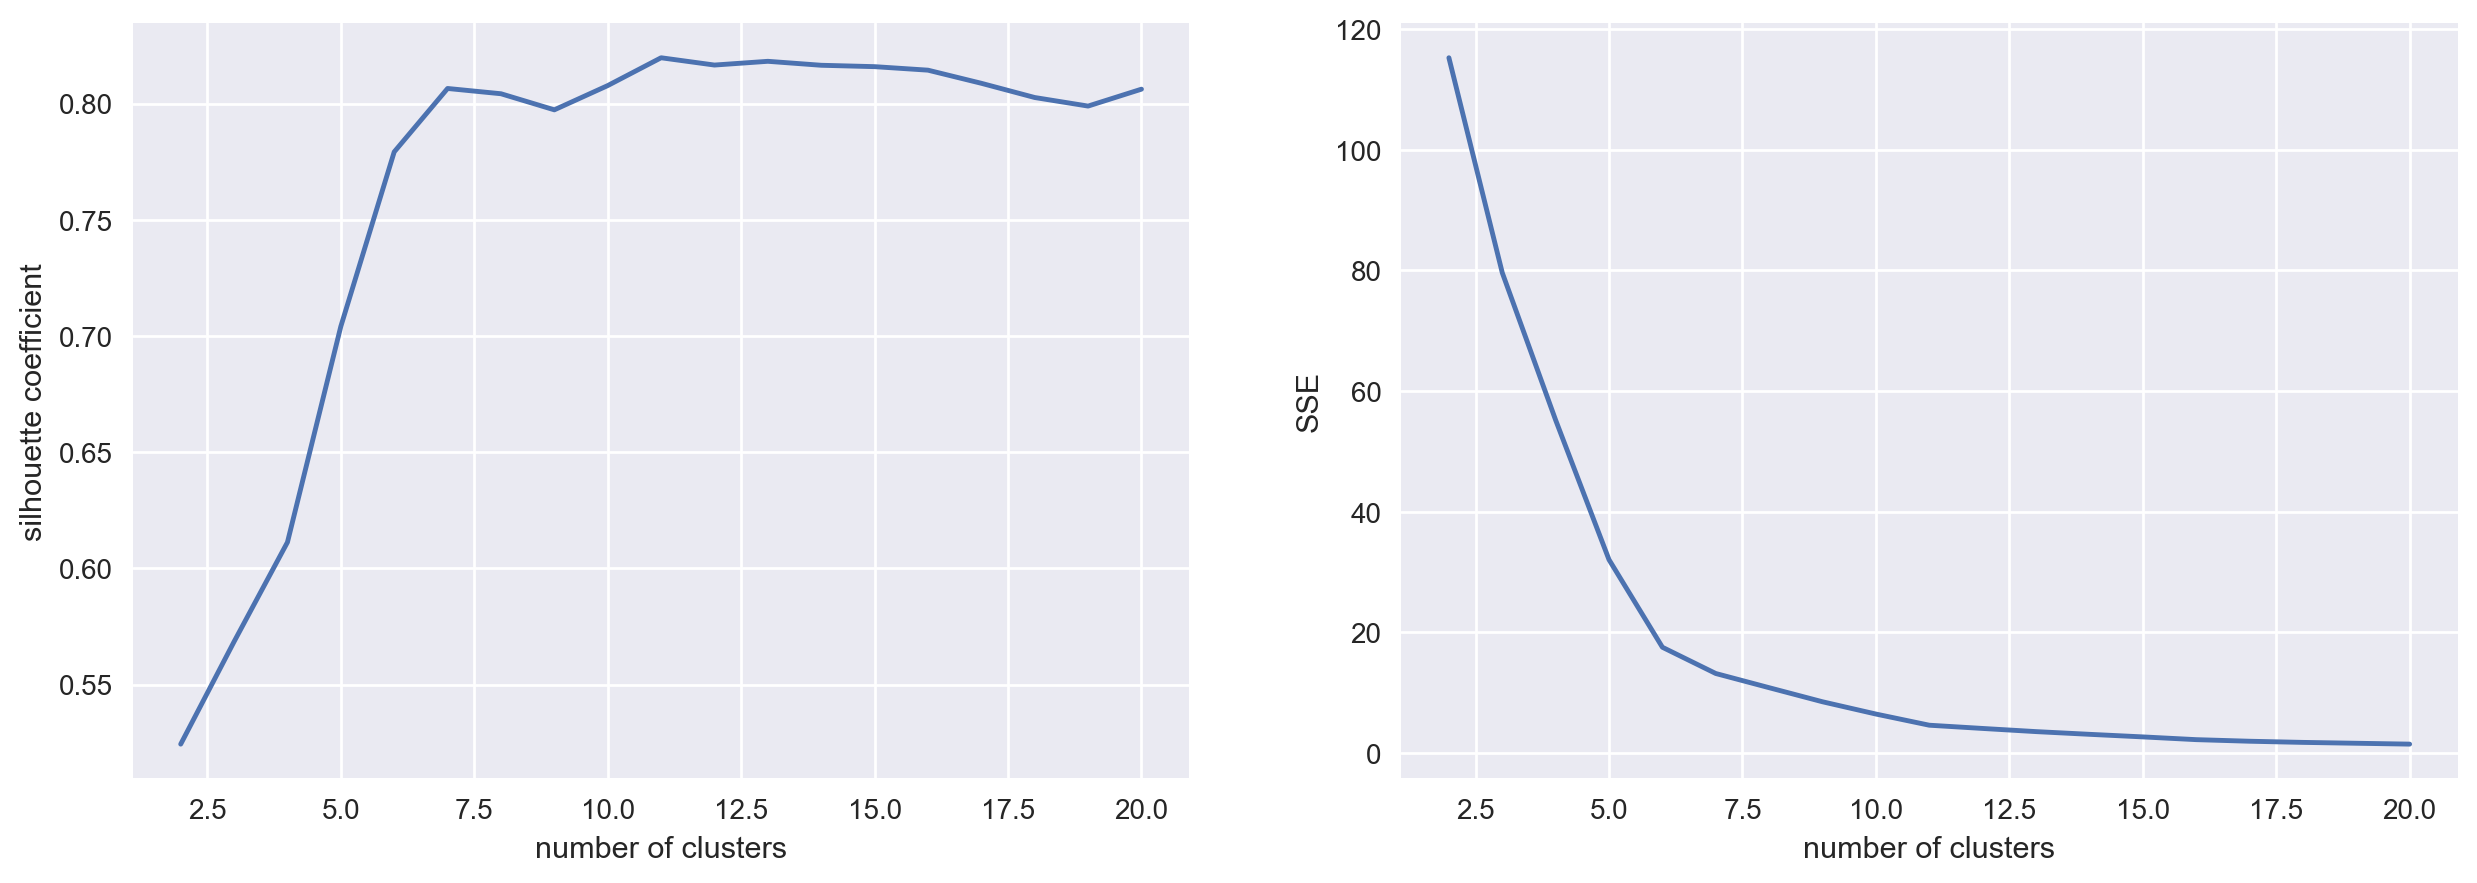

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,21)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [68]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(X_centered_projected)

In [71]:
centers = km.cluster_centers_
centers

array([[9.45032045e-07, 9.45032062e-07, 2.62917196e-01, 9.45032046e-07,
        1.59432678e-04, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        3.44113765e-03, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032063e-07, 4.20935104e-03, 7.29258707e-01],
       [5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02],
       [1.26875080e-05, 1.26875081e-05, 1.26875081e-05, 1.26875080e-05,
        1.26875081e-05, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        9.98790780e-01, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        1.26875080e-05, 1.26875080e-05, 1.26875080e-05, 1.2687

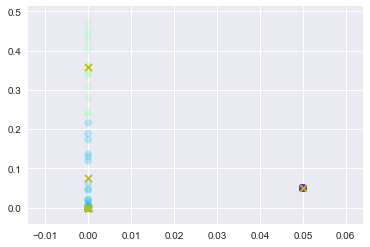

In [72]:
plt.scatter(X_centered_projected[:, 0], X_centered_projected[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='y')
#plt.xlim(-.5,1.5)
#plt.ylim(1.5,4.5)

In [121]:
os.system('say "your move Commander"')

0